In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
# Carregar todos os anos
df_2011 = pd.read_csv("model_clustering/base_original_2011.csv")
df_2012 = pd.read_csv("model_clustering/base_original_2012.csv")
df_2013 = pd.read_csv("model_clustering/base_original_2013.csv")
df_2014 = pd.read_csv("model_clustering/base_original_2014.csv")
df_2015 = pd.read_csv("model_clustering/base_original_2015.csv")
df_2016 = pd.read_csv("model_clustering/base_original_2016.csv")


In [3]:
# Concatenar todas as bases
lista_dataframes = [df_2011, df_2012, df_2013, df_2014, df_2015, df_2016]
df_concatenado = pd.concat(lista_dataframes)

In [4]:
# Remover coluna
del df_concatenado['Unnamed: 0']

In [5]:
df_concatenado

,Suma de Qtd. Vendida,Promedio de Preço médio de venda,cluster,Categoria,Departamento,Produto,Evento,Loja,Região,Produto_Loja,Ano
0,272,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,BOS_1,BOS,ACCESORIES_1_234_BOS_1,2011
1,305,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,BOS_2,BOS,ACCESORIES_1_234_BOS_2,2011
2,52,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,BOS_3,BOS,ACCESORIES_1_234_BOS_3,2011
3,410,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,NYC_3,NYC,ACCESORIES_1_234_NYC_3,2011
4,536,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,PHI_1,PHI,ACCESORIES_1_234_PHI_1,2011
...,...,...,...,...,...,...,...,...,...,...,...
29994,1,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_333,Easter,BOS_2,BOS,NaN,2016
29995,1,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_39,Easter,BOS_2,BOS,NaN,2016
29996,1,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_424,Easter,BOS_2,BOS,NaN,2016
29997,2,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_528,Easter,BOS_2,BOS,NaN,2016


In [6]:
# Criar chave - Proudto/Loja
df_concatenado['Produto_Loja'] = df_concatenado['Produto'] + '_' + df_concatenado['Loja']

In [7]:
# Corrigir arredondamento de valores
df_concatenado['Promedio de Preço médio de venda'] = df_concatenado['Promedio de Preço médio de venda'].round(2)

In [8]:
df_concatenado

,Suma de Qtd. Vendida,Promedio de Preço médio de venda,cluster,Categoria,Departamento,Produto,Evento,Loja,Região,Produto_Loja,Ano
0,272,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,BOS_1,BOS,ACCESORIES_1_234_BOS_1,2011
1,305,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,BOS_2,BOS,ACCESORIES_1_234_BOS_2,2011
2,52,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,BOS_3,BOS,ACCESORIES_1_234_BOS_3,2011
3,410,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,NYC_3,NYC,ACCESORIES_1_234_NYC_3,2011
4,536,4.0,1,ACCESORIES,ACCESORIES_1,ACCESORIES_1_234,NoEvent,PHI_1,PHI,ACCESORIES_1_234_PHI_1,2011
...,...,...,...,...,...,...,...,...,...,...,...
29994,1,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_333,Easter,BOS_2,BOS,HOME&GARDEN_1_333_BOS_2,2016
29995,1,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_39,Easter,BOS_2,BOS,HOME&GARDEN_1_39_BOS_2,2016
29996,1,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_424,Easter,BOS_2,BOS,HOME&GARDEN_1_424_BOS_2,2016
29997,2,371.0,0,HOME&GARDEN,HOME&GARDEN_1,HOME&GARDEN_1_528,Easter,BOS_2,BOS,HOME&GARDEN_1_528_BOS_2,2016


In [9]:
# Criar nova coluna
df_concatenado['cluster_unificado'] = 0

Relação dos novos clusters após análise

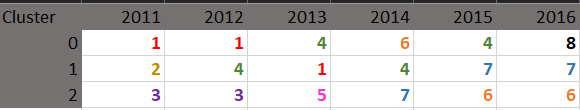

In [10]:
# Adicionar novos clusters a base
df_concatenado.loc[(df_concatenado['cluster'] == 0) & (df_concatenado['Ano'] == 2011), 'cluster_unificado'] = 1
df_concatenado.loc[(df_concatenado['cluster'] == 1) & (df_concatenado['Ano'] == 2011), 'cluster_unificado'] = 2
df_concatenado.loc[(df_concatenado['cluster'] == 2) & (df_concatenado['Ano'] == 2011), 'cluster_unificado'] = 3
df_concatenado.loc[(df_concatenado['cluster'] == 0) & (df_concatenado['Ano'] == 2012), 'cluster_unificado'] = 1
df_concatenado.loc[(df_concatenado['cluster'] == 1) & (df_concatenado['Ano'] == 2012), 'cluster_unificado'] = 4
df_concatenado.loc[(df_concatenado['cluster'] == 2) & (df_concatenado['Ano'] == 2012), 'cluster_unificado'] = 3
df_concatenado.loc[(df_concatenado['cluster'] == 0) & (df_concatenado['Ano'] == 2013), 'cluster_unificado'] = 4
df_concatenado.loc[(df_concatenado['cluster'] == 1) & (df_concatenado['Ano'] == 2013), 'cluster_unificado'] = 1
df_concatenado.loc[(df_concatenado['cluster'] == 2) & (df_concatenado['Ano'] == 2013), 'cluster_unificado'] = 5
df_concatenado.loc[(df_concatenado['cluster'] == 0) & (df_concatenado['Ano'] == 2014), 'cluster_unificado'] = 6
df_concatenado.loc[(df_concatenado['cluster'] == 1) & (df_concatenado['Ano'] == 2014), 'cluster_unificado'] = 4
df_concatenado.loc[(df_concatenado['cluster'] == 2) & (df_concatenado['Ano'] == 2014), 'cluster_unificado'] = 7
df_concatenado.loc[(df_concatenado['cluster'] == 0) & (df_concatenado['Ano'] == 2015), 'cluster_unificado'] = 4
df_concatenado.loc[(df_concatenado['cluster'] == 1) & (df_concatenado['Ano'] == 2015), 'cluster_unificado'] = 7
df_concatenado.loc[(df_concatenado['cluster'] == 2) & (df_concatenado['Ano'] == 2015), 'cluster_unificado'] = 6
df_concatenado.loc[(df_concatenado['cluster'] == 0) & (df_concatenado['Ano'] == 2016), 'cluster_unificado'] = 8
df_concatenado.loc[(df_concatenado['cluster'] == 1) & (df_concatenado['Ano'] == 2016), 'cluster_unificado'] = 7
df_concatenado.loc[(df_concatenado['cluster'] == 2) & (df_concatenado['Ano'] == 2016), 'cluster_unificado'] = 6


In [11]:
# Verificar a distribuição de clusters
df_concatenado['cluster_unificado'].value_counts()

4    89692
2    29222
8    28936
3    28104
6     2932
1      809
7      275
5       24
Name: cluster_unificado, dtype: int64

In [12]:
# Salvar a base para usar no Power BI
df_concatenado.to_csv('model_clustering/cluster_base_original_ano.csv')